In [223]:
#--------------------------Import libraries-----------------------------
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [625]:
#----------------------------Import data----------------------------------
path= "./"
filelocation= "zomatodf.csv"
df= pd.read_csv(path + filelocation)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [626]:
df.shape

(51717, 17)

In [627]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [628]:
df.isnull().sum() #Find out missing values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [629]:
[feature for feature in df.columns if df[feature].isnull().sum() > 1 ]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [631]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',','')) #Change the data type and remove the comma

In [632]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [633]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [634]:
df['rate'].dtype

dtype('O')

In [635]:
def split(x):
    return x.split('/')[0]

In [636]:
df['rate']=df['rate'].astype(str).apply(split)

In [637]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [638]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [639]:
df['rate']=df['rate'].astype(float)

In [640]:
df['rate'].dtype

dtype('float64')

In [641]:
#----------------------------Output data-------------------------------

In [642]:
df.to_csv('zomato_clean.csv',index=False)

<AxesSubplot:>

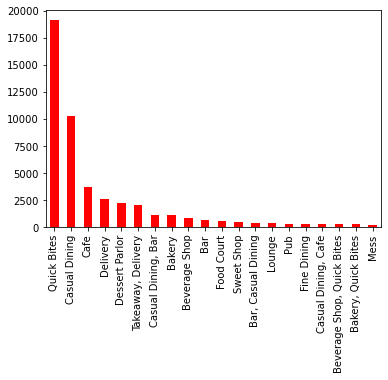

In [643]:
#---------------------------------EDA-------------------------
#plt.figure(figsize=(15,8))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red') #categories of restaurant

In [644]:
def mark(x):
    if x in ('Quick Bites','Casual Biting'):
        return 'Quick Bites+Casual Biting'
    else:
        return 'others'

In [645]:
values=df['Top_types']=df['rest_type'].apply(mark)

In [646]:
labels=values=df['Top_types'].value_counts().values

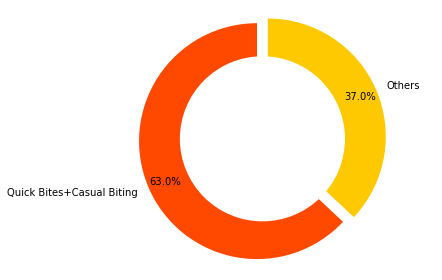

In [647]:
#colors
colors = ['#ff4800','#fec901']
 
#explsion
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(values, colors = colors, labels=['Quick Bites+Casual Biting','Others'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [648]:
#Creat a dataframe in which we have votes, costs and rating of each restaurant
rest=df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()

In [649]:
rest.columns=['name','total_votes','total_unities','avg_approx_cost','mean_rating']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [650]:
rest['votes_per_unit'] = rest['total_votes']/ rest['total_unities']

In [651]:
popular=rest.sort_values(by='total_unities',ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unit
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [652]:
popular.shape

(8792, 6)

In [653]:
popular['name'].nunique()

8792

In [654]:
rest.to_csv('rest.csv',index=False)

In [655]:
#-----------------------------Finding best budget restaurants-------------------------------------------

In [656]:
filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget = df [filter]
budget.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Biting
934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Biting
940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,Quick Bites+Casual Biting
942,https://www.zomato.com/bangalore/roti-wala-btm...,"688, 7th Main, 10th Cross Main Road, 2nd Stage...",Roti Wala,Yes,No,4.0,197,+91 9731100002,BTM,Quick Bites,"Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...",North Indian,300.0,"[('Rated 5.0', 'RATED\n Well, I never had a c...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Biting
954,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.1,464,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300.0,"[('Rated 4.0', ""RATED\n It's a great outlet t...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Biting


In [657]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [658]:
def return_budget(location,restaurant_type):
    filter=(df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget = df [filter]
    return budget['name'].unique()

In [659]:
return_budget('BTM','Quick Bites')#find best budget restaurantrs in any locations

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [660]:
#lat,lon (which places have highest rated restaurants)
#!pip install geopy

In [661]:
from geopy.geocoders import Nominatim

In [662]:
geolocator=Nominatim(user_agent='app')

In [663]:
data=df['name'][0]
data

'Jalsa'

In [664]:
data=geolocator.geocode(data)

In [665]:
data.latitude

18.5150741

In [666]:
data.longitude

73.82920125

In [667]:
#Mapping(geographical analysis)

In [668]:
df.shape

(51717, 18)

In [669]:
df['location'].nunique()#number of unique locations

93

In [670]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [671]:
lat=[]
lon=[]

for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [672]:
locations['latitude']=lat
locations['longitude']=lon

In [673]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [674]:
Rest_locations=df['location'].value_counts().reset_index()
Rest_locations.head()

,index,location
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


In [675]:
Rest_locations.columns=['Name','count']
Rest_locations

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [676]:
Restaurant_locations=Rest_locations.merge(locations,on='Name').dropna()
Restaurant_locations.head()

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858


In [677]:
Restaurant_locations

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858
...,...,...,...,...
88,West Bangalore,6,12.984852,77.540063
89,Yelahanka,6,13.100698,77.596345
90,Jakkur,3,13.078474,77.606894
91,Rajarajeshwari Nagar,2,12.927441,77.515522


In [678]:
Restplaceindex=df.groupby('location').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
Restplaceindex.columns=['Name','total_votes','total_unities','avg_approx_cost','mean_rating']
Restplaceindex.head()

,Name,total_votes,total_unities,avg_approx_cost,mean_rating
0,BTM,619376,5124,396.480973,3.296128
1,Banashankari,162374,906,421.225166,3.373292
2,Banaswadi,35657,664,397.013783,3.362926
3,Bannerghatta Road,219077,1630,443.679654,3.271677
4,Basavanagudi,94919,684,360.979532,3.478185


In [679]:
Highrate_locations=pd.merge(Restplaceindex,locations,on=['Name']).dropna()
Highrate_locations.head()

,Name,total_votes,total_unities,avg_approx_cost,mean_rating,latitude,longitude
0,BTM,619376,5124,396.480973,3.296128,45.954851,-112.496595
1,Banashankari,162374,906,421.225166,3.373292,15.887678,75.704678
2,Banaswadi,35657,664,397.013783,3.362926,13.014162,77.651854
3,Bannerghatta Road,219077,1630,443.679654,3.271677,12.928862,77.600598
4,Basavanagudi,94919,684,360.979532,3.478185,12.941726,77.575502


In [680]:
Highrate_locations.to_csv('Highrate_locations.csv',index=False)

In [681]:
#-------------------Drawing heatmaps------------------------
import folium 
from folium.plugins import HeatMap

In [682]:
Rest_locations

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [683]:
Restaurant_locations=Rest_locations.merge(locations,on='Name').dropna()

In [684]:
basemap1=folium.Map(location=[12.97,77.59])

In [685]:
HeatMap(data=Restaurant_locations[['latitude','longitude','count']]).add_to(basemap1)

In [801]:
basemap1#count of restaurants

In [687]:
basemap2=folium.Map(location=[12.97,77.59])

In [688]:
HeatMap(data=Highrate_locations[['latitude','longitude','mean_rating']]).add_to(basemap2)

In [689]:
basemap2#mean rating

In [802]:
basemap2.save('m1.html')

In [690]:
basemap3=folium.Map(location=[12.97,77.59])

In [691]:
HeatMap(data=Highrate_locations[['latitude','longitude','avg_approx_cost']]).add_to(basemap3)

In [692]:
basemap3#avg_approx_cost

In [693]:
#---------------------------------Analysis Customer Behavior------------------

In [694]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator#stopwords are useless words like am is are.
from PIL import Image

In [695]:
data1=df[df['rest_type']=='Quick Bites']

In [696]:
data1['dish_liked'].isnull().sum()

13843

In [697]:
dishes=''
for word in data1['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes=dishes+''.join(words)+''

In [698]:
stopwords=set(STOPWORDS)
wordcloud1=WordCloud(stopwords=stopwords,width=1500, height=1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

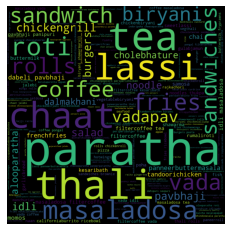

In [699]:
plt.imshow(wordcloud1)# What is the most frequent kind of food exist in category of Quick Bites
plt.axis('off')

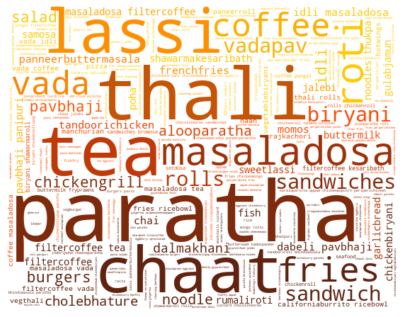

In [700]:
# What is the most frequent kind of dish exist in category of Quick Bites
mask = np.array(Image.open("mask.png"))
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(dishes)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/spa_wine.png", format="png")
plt.show()

In [701]:
cuis=''
for word in df['cuisines'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    cuis=cuis+''.join(words)+''

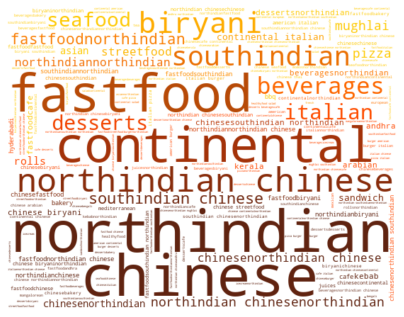

In [702]:
# What is the most frequent kind of cuisine exist in category of Quick Bites
mask = np.array(Image.open("mask.png"))
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(cuis)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/spa_wine.png", format="png")
plt.show()

In [703]:
data2=df[df['rest_type']=='Delivery']
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 32 to 51340
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          2604 non-null   object 
 1   address                      2604 non-null   object 
 2   name                         2604 non-null   object 
 3   online_order                 2604 non-null   object 
 4   book_table                   2604 non-null   object 
 5   rate                         1791 non-null   float64
 6   votes                        2604 non-null   int64  
 7   phone                        2522 non-null   object 
 8   location                     2604 non-null   object 
 9   rest_type                    2604 non-null   object 
 10  dish_liked                   707 non-null    object 
 11  cuisines                     2595 non-null   object 
 12  approx_cost(for two people)  2587 non-null   float64
 13  reviews_list    

In [704]:
dishes2=''
for word in data2['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes2=dishes2+''.join(words)+''

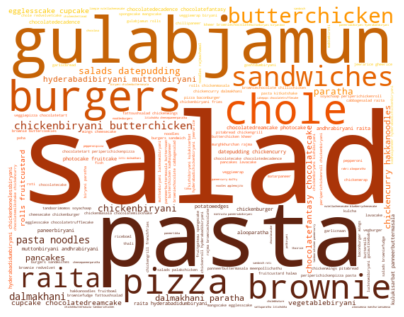

In [705]:
# What is the most frequent kind of dish exist in category of Delivery
mask = np.array(Image.open("mask.png"))
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(dishes2)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/spa_wine.png", format="png")
plt.show()

In [706]:
#------------------------------------Machine Learning-------------------------------
#-----------------------------------Set target labels--------------------------------

In [707]:
def assigh(x):
    if x>0:
        return 1
    else:
        return 0

In [708]:
df['rated']=df['rate'].apply(assigh)

In [709]:
df['rated'].unique()

array([1, 0])

In [710]:
new_restaurants=df[df['rated']==0]
train_val_restaurants=df.query('rated==1')#Set new restaurants as training set

In [711]:
x=[41665,10052]

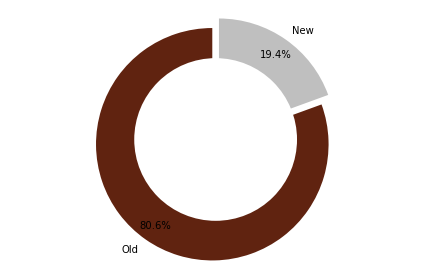

In [712]:
#colors
colors = ['#602310','#BFBFBF']
 
#explsion
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(x, colors = colors, labels=['Old','New'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [713]:
#Create a target variable. Rating < 3.75 : bad restaurant; Rating > 3.75 : good restaurant


In [714]:
threshold=3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)

/tmp/ipykernel_3730/2652642898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)


In [715]:
x=train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [716]:
labels=x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x7fcc3b20aee0>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

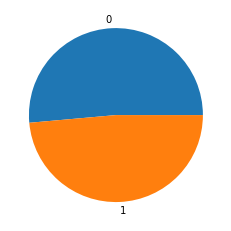

In [717]:
plt.pie(x,labels=labels)

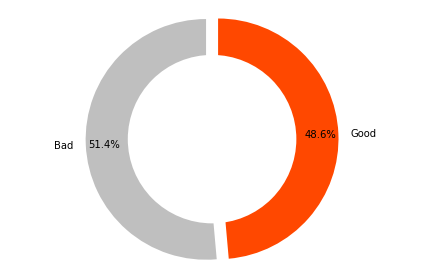

In [718]:
#colors
colors = ['#BFBFBF','#FF4800']
 
#explsion
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(x, colors = colors, labels=['Bad','Good'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [719]:
#-------------------------Perform Feature Importance-------------------------

In [720]:
train_val_restaurants['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [721]:
def count(x):
    return len(x.split(','))

In [722]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

/tmp/ipykernel_3730/302429901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)


In [723]:
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

/tmp/ipykernel_3730/279784965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)


In [724]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [725]:
imp_features=['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 'target',
       'total_cuisines', 'multiple_types']

In [726]:
data=train_val_restaurants[imp_features]

In [727]:
data.shape

(41665, 10)

In [728]:
#---------------------------Dealing with missing data------------------------------

In [729]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [730]:
data.dropna(how='any',inplace=True)

/tmp/ipykernel_3730/3923625894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='any',inplace=True)


In [731]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [732]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [733]:
cat_features=[col for col in data.columns if data[col].dtype=='0']

In [734]:
cat_col=[]
for col in data.columns:
    if data[col].dtype == '0':
        cat_col.append(col)
cat_col

[]

In [735]:
num_features=[col for col in data.columns if data[col].dtype!='0']
num_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'approx_cost(for two people)',
 'listed_in(type)',
 'listed_in(city)',
 'target',
 'total_cuisines',
 'multiple_types']

In [736]:
cat_features=['online_order',
 'book_table',
 'location',
 'rest_type','listed_in(type)',
 'listed_in(city)']

In [737]:
num_features=['approx_cost(for two people)','target',
 'total_cuisines',
 'multiple_types']

In [738]:
data

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,2,2
51711,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,4,2
51712,No,No,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0,1,1
51715,No,Yes,"ITPL Main Road, Whitefield",Bar,2500.0,Pubs and bars,Whitefield,1,1,1


In [739]:
for feature in cat_features:
    print('{}has total {} unique features '.format(feature,data[feature].nunique()))

online_orderhas total 2 unique features 
book_tablehas total 2 unique features 
locationhas total 92 unique features 
rest_typehas total 87 unique features 
listed_in(type)has total 7 unique features 
listed_in(city)has total 30 unique features 


In [740]:
#--------------------------Feature Encoding--------------------------

In [741]:
data[cat_features].head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [742]:
data['location'].nunique()

92

In [743]:
values=(data['location'].value_counts()/len(data))*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [744]:
threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [745]:
data['location'].nunique()

92

In [746]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

/tmp/ipykernel_3730/114142037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')


In [747]:
data['location'].nunique()

47

In [748]:
#data['location'].apply(lambda x:'other' if x not in imp.index else x)

In [749]:
values2=(data['rest_type'].value_counts()/len(data))*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [750]:
threshold=1.5
imp2=values2[values2>threshold]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [751]:
len(imp2)

10

In [752]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [753]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

/tmp/ipykernel_3730/1671127400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')


In [754]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [755]:
for feature in cat_features:
    print('{}has total {} unique features '.format(feature,data[feature].nunique()))

online_orderhas total 2 unique features 
book_tablehas total 2 unique features 
locationhas total 47 unique features 
rest_typehas total 11 unique features 
listed_in(type)has total 7 unique features 
listed_in(city)has total 30 unique features 


In [756]:
##One hot Encoding

In [757]:
data_cat=data[cat_features]

In [758]:
for col in cat_features:
    col_encoded=pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)

In [759]:
data_cat.shape

(41271, 93)

In [760]:
#---------------------------Random Forest----------------------------

In [761]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [762]:
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [763]:
data_final=pd.concat([data.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']],data_cat],axis=1)

In [764]:
data_final.head()

,approx_cost(for two people),target,total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [765]:
X=data_final.drop('target',axis=1)
Y=data_final['target']

In [766]:
from sklearn.model_selection import train_test_split

In [767]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [769]:
X_train.shape

(33016, 96)

In [770]:
from sklearn.ensemble import RandomForestClassifier

In [771]:
model=RandomForestClassifier()

In [772]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [773]:
predictions=model.predict(X_test)

In [774]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [775]:
confusion_matrix(predictions,Y_test)

array([[3515,  954],
       [ 737, 3049]])

In [776]:
accuracy_score(predictions,Y_test)

0.7951544518473652

In [777]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(X_test,Y_test)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

[Text(0.5, 0.875, 'listed_in(type)_Drinks & nightlife <= 0.5\ngini = 0.5\nsamples = 5205\nvalue = [4219, 4036]'),
 Text(0.25, 0.625, 'rest_type_Quick Bites <= 0.5\ngini = 0.499\nsamples = 5057\nvalue = [4169, 3854]'),
 Text(0.125, 0.375, 'book_table_Yes <= 0.5\ngini = 0.49\nsamples = 3317\nvalue = [2259, 3007]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2662\nvalue = [2193, 2063]'),
 Text(0.1875, 0.125, 'gini = 0.122\nsamples = 655\nvalue = [66, 944]'),
 Text(0.375, 0.375, 'location_Vasanth Nagar <= 0.5\ngini = 0.426\nsamples = 1740\nvalue = [1910, 847]'),
 Text(0.3125, 0.125, 'gini = 0.427\nsamples = 1730\nvalue = [1898, 847]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [12, 0]'),
 Text(0.75, 0.625, 'total_cuisines <= 2.5\ngini = 0.338\nsamples = 148\nvalue = [50, 182]'),
 Text(0.625, 0.375, 'listed_in(city)_Koramangala 7th Block <= 0.5\ngini = 0.494\nsamples = 56\nvalue = [38, 47]'),
 Text(0.5625, 0.125, 'gini = 0.493\nsamples = 50\nvalue = [34, 43]'),
 Text(0.6875, 

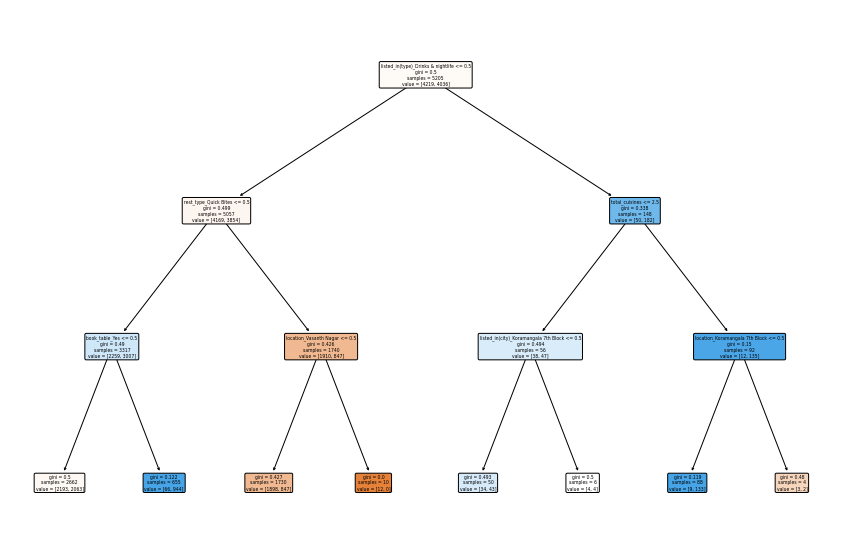

In [608]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_test.columns, 
          filled=True, impurity=True, 
          rounded=True)

In [619]:
rf.feature_importances_

array([2.17636036e-01, 6.97343807e-02, 3.08899367e-02, 1.81645923e-02,
       2.49850915e-01, 4.62179794e-05, 7.25674061e-04, 6.00782309e-03,
       4.59672660e-04, 1.07453811e-03, 4.62410251e-05, 0.00000000e+00,
       5.30571680e-03, 4.13326507e-04, 3.71614865e-04, 1.61501600e-03,
       8.05623452e-05, 5.75091359e-03, 0.00000000e+00, 2.46212200e-05,
       5.21964590e-03, 1.15229702e-04, 1.67131895e-04, 0.00000000e+00,
       8.18382522e-05, 1.80518584e-04, 0.00000000e+00, 2.62180774e-03,
       5.79908538e-03, 3.81000265e-02, 5.36441533e-04, 1.81003213e-03,
       0.00000000e+00, 8.14816961e-03, 5.86956797e-03, 3.11054303e-04,
       7.18146109e-03, 0.00000000e+00, 0.00000000e+00, 3.32807049e-05,
       9.57343946e-04, 5.17377449e-04, 0.00000000e+00, 0.00000000e+00,
       2.68202190e-04, 1.66980540e-03, 3.03667901e-04, 3.53521095e-05,
       0.00000000e+00, 0.00000000e+00, 2.25246316e-02, 9.46170346e-04,
       2.81320099e-03, 2.59213721e-02, 1.30785782e-02, 1.45835259e-02,
      

/home/qinren/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


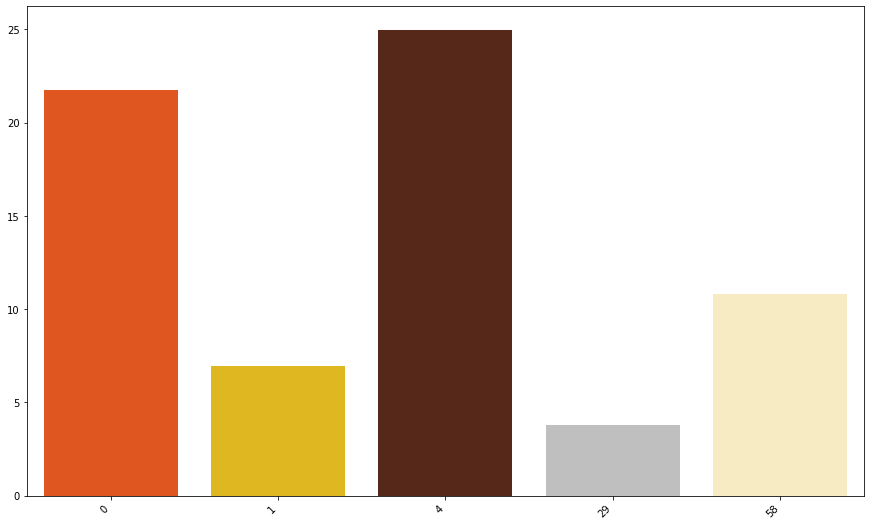

In [800]:
feature_importance_1 = pd.Series(rf.feature_importances_)
feature_importance_1.sort_values(inplace=True, ascending=False)
feature_importance_1

plt.figure(figsize=(15,9))
plot_1 = sns.barplot(feature_importance_1.index[0:5], feature_importance_1[0:5]*100, 
                     palette=['#ff4800','#fec901','#602310','#BFBFBF','#fff0b9'])
#plot_1.set_title("Top 5 Important Feature ", fontsize=25)
#plot_1.set_xlabel("Feature", fontsize=15)
#plot_1.set_ylabel("Importance", fontsize=15)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation = 45, 
                       horizontalalignment='right')
plt.show()

In [ ]:
sns.color_palette("YlOrBr", 10